In [2]:
from scipy.io import loadmat
from skimage.segmentation import slic, mark_boundaries
from skimage.util import img_as_float
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:

def getSuperpixel(img: np.ndarray,lbl:np.ndarray,id: int):
  shp = img.shape
  res = np.zeros(shp)
  for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      res[x,y] = img[x,y] if lbl[x,y] == id else 0.0
  return res

In [4]:
def chi_distance(counts1, counts2):
  l = len(counts1)
  distance = 0
  
  for i in range(l):
    if (counts1[i] + counts2[i]):
      distance += ((counts1[i]-counts2[i])**2) / (counts1[i] + counts2[i])
  return distance

In [5]:
# Datos de entrenamiento
vol0 = plt.imread('volumen0.png')
vol0 = cv2.cvtColor(vol0, cv2.COLOR_RGB2GRAY)

vol1 = plt.imread('volumen1.png')
vol1 = cv2.cvtColor(vol1, cv2.COLOR_RGB2GRAY)

# Datos de prueba
vol2 = plt.imread('volumen2.png')
vol2 = cv2.cvtColor(vol2, cv2.COLOR_RGB2GRAY)

In [8]:
superPixel0 = slic(img_as_float(vol0),200,0.1)
superPixel1 = slic(img_as_float(vol1),200,0.1)
superPixel2 = slic(img_as_float(vol2),200,0.1)


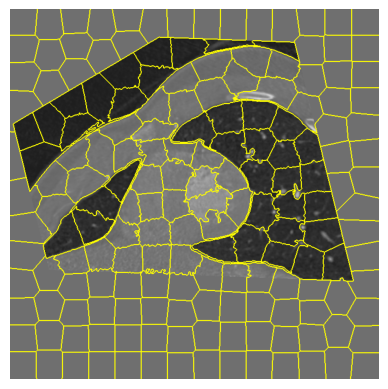

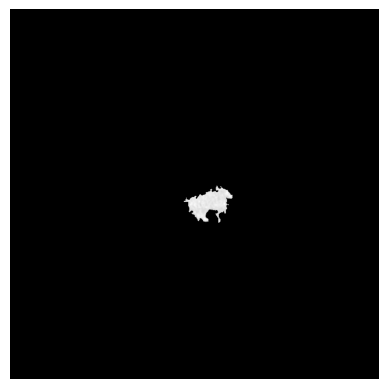

<Figure size 640x480 with 0 Axes>

In [48]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(mark_boundaries(vol1, superPixel1))
plt.axis('off')

# start = 80
# datas = getSuperpixel(vol1,superPixel1,start)

# for i in range(start+1, start+11):
#   datas += getSuperpixel(vol1,superPixel1,i)

# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.imshow(datas, cmap=plt.cm.gray)
# plt.axis('off')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(getSuperpixel(vol1,superPixel1,90), cmap=plt.cm.gray)
plt.axis('off')



In [49]:
regiones_interes = [getSuperpixel(vol0,superPixel0,81),getSuperpixel(vol0,superPixel0,92),getSuperpixel(vol1,superPixel1,83),getSuperpixel(vol1,superPixel1,90)]

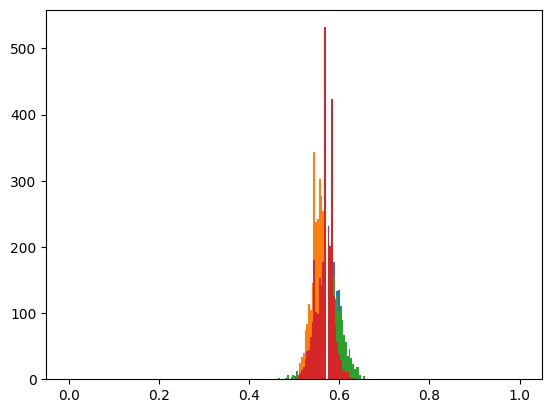

In [50]:
histogramas = []
for region in regiones_interes:
  temp = region[region != 0].ravel()
  n,bins,patches = plt.hist(temp,256,[0,1])
  histogramas.append(n)

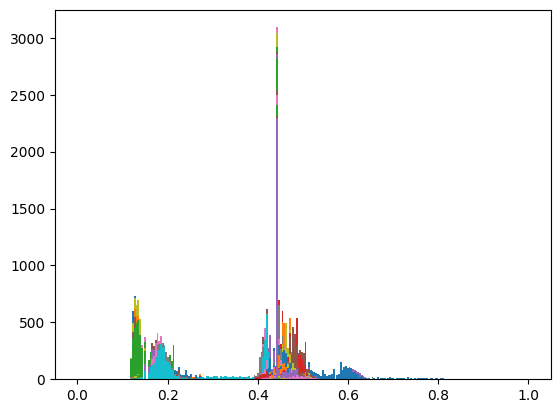

In [71]:
# Prueba
id_interes = []
f = open('salidas.txt','w')

for super_pixel_id in range(1,201):
  superPixel = getSuperpixel(vol2,superPixel2,super_pixel_id)
  tmp = superPixel[superPixel != 0].ravel()
  n,bins,patches = plt.hist(tmp,256,[0,1])
  
  mean_distance = 0
  
  for hist in histogramas:
    mean_distance += chi_distance(n,hist)
  mean_distance = mean_distance / len(histogramas)
  
  f.write(str(mean_distance)+'\n')
  
  if mean_distance < 2000:
    id_interes.append(super_pixel_id)  

f.close()
  

(-0.5, 674.5, 676.5, -0.5)

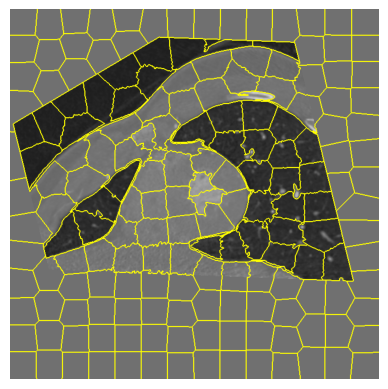

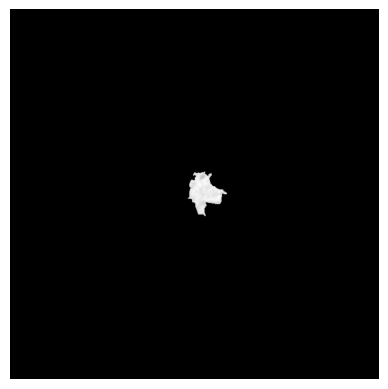

In [75]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(mark_boundaries(vol2,superPixel2), cmap=plt.cm.gray)
plt.axis('off')

detected_areas = np.zeros(vol2.shape[:2])
for id in id_interes:
  detected_areas += getSuperpixel(vol2, superPixel2,id)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(detected_areas, cmap=plt.cm.gray)
plt.axis('off')
